In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import json

In [2]:
df=pd.read_csv('cancel_train.csv')
df

,mon,state,originalagency,speed,wirecenter,InstallType,competitorname,ContractType,salesrepid,order_create_date,...,strOrderType,strIsWinbackIndicator,notruckrollrequiredreason,droptype,premisetype,ONTselfinstallcapable,saleschannel,bundlename,smartcart,cancel_ind
0,NY11345685302,NY,REDVENT: REDVENT,FTTP_100M_100M,BREWSTER,TECH INSTALL,COMCAST,MONTHTOMONTH,A001696,2/4/18,...,N,NO,NaN,AERIAL,SFU,N,RED VENTURES,UNKNOWN,0,NaN
1,MD11346031526,MD,CSSC: CSSC,FTTP_1000M_1000M,OWEN BROWN,TECH INSTALL,COMCAST,CONTRACT,A002775,2/5/18,...,N,NO,NaN,BURIED,SFU,N,BIG BOX,1000M + TV Mundo + FDV Unlim,0,NaN
2,PA11346211594,PA,ONLINE: ONLINE,FTTP_100M_100M,BRADDOCK,TECH INSTALL,COMCAST,MONTHTOMONTH,239B3PA,2/7/18,...,N,NO,NaN,AERIAL,SFU,N,ONLINE CON,UNKNOWN,1,NaN
3,VA11346969162,VA,CSSC: CSSC,FTTP_1000M_1000M,DRUMMONDS CORNER,TECH INSTALL,COX COMM,CONTRACT,V660449,2/9/18,...,M,NO,NaN,BURIED,SFU,N,CSSC,1000M + Extreme HD - 2014 + NO FDV,0,NaN
4,NY11345471806,NY,ONLINE: ONLINE,FTTP_1000M_1000M,LEVITTOWN,TECH INSTALL,CABLEVISION,CONTRACT,C7962VZ,2/3/18,...,N,NO,NaN,AERIAL,SFU,N,ONLINE CON,1000M + Preferred HD 2015 + FDV Unlim,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50586,NY11346543694,NY,CSSC: CSSC,FTTP_150M_150M,BROAD STREET,TECH INSTALL,TIME WARNER,CONTRACT,A003915,2/7/18,...,M,NO,NaN,MDU_INSIDE,MDU,Y,D2D CON,150M + Preferred HD 2015 + FDV Unlim,0,1.0
50587,NJ11345798633,NJ,CSSC: CSSC,FTTP_1000M_1000M,MARLTON,TECH INSTALL,COMCAST,CONTRACT,LOCKDA4,2/5/18,...,M,NO,NaN,BURIED,SFU,N,CSSC,1000M + Extreme HD - 2014 + FDV Unlim,0,NaN
50588,MD11345784978,MD,ONLINE: ONLINE,FTTP_75M_75M,BETHESDA,TECH INSTALL,COMCAST,MONTHTOMONTH,V320760,2/5/18,...,N,NO,NaN,MDU_INSIDE,MDU,N,CSSC,75M + Preferred HD 2015 + NO FDV,0,NaN
50589,VA11347258162,VA,CSSC: CSSC,FTTP_50M_50M,DULLES CORNER,SUPERCEDURE,COX COMM,CONTRACT,VISAGAL,2/10/18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50M + Preferred HD 2015 + FDV Unlim,0,1.0


In [3]:
(df
 #.describe()
 .columns
)

Index(['mon', 'state', 'originalagency', 'speed', 'wirecenter', 'InstallType',
       'competitorname', 'ContractType', 'salesrepid', 'order_create_date',
       'canceldate', 'endclientsystem', 'hfws_ind', 'due_date',
       'FIRSTOFFEREDDATE', 'waitingdayofcustomers', 'waitingdayforcompany',
       'BUNDLE', 'BundleType', 'ONTRequired', 'ONTInstall', 'strOrderType',
       'strIsWinbackIndicator', 'notruckrollrequiredreason', 'droptype',
       'premisetype', 'ONTselfinstallcapable', 'saleschannel', 'bundlename',
       'smartcart', 'cancel_ind'],
      dtype='object')

In [4]:
df.inf

AttributeError: 'DataFrame' object has no attribute 'inf'

In [249]:
(df
 #.describe()
 #.columns
 .info()
 
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50591 entries, 0 to 50590
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   mon                        50591 non-null  object 
 1   state                      50591 non-null  object 
 2   originalagency             50591 non-null  object 
 3   speed                      50591 non-null  object 
 4   wirecenter                 50583 non-null  object 
 5   InstallType                50591 non-null  object 
 6   competitorname             50535 non-null  object 
 7   ContractType               50591 non-null  object 
 8   salesrepid                 50383 non-null  object 
 9   order_create_date          50591 non-null  object 
 10  canceldate                 6170 non-null   object 
 11  endclientsystem            50412 non-null  object 
 12  hfws_ind                   2164 non-null   object 
 13  due_date                   50359 non-null  obj

In [75]:
dates=['order_create_date','canceldate','due_date','FIRSTOFFEREDDATE','waitingdayofcustomers','waitingdayforcompany']

In [172]:
due_date_indices=list(df[df.due_date.isna()].index)
due_date_indices

[42,
 234,
 447,
 480,
 633,
 634,
 672,
 825,
 826,
 925,
 940,
 989,
 1037,
 1044,
 1072,
 1096,
 1121,
 1161,
 1193,
 1533,
 1557,
 1592,
 1837,
 1991,
 2014,
 2027,
 2047,
 2048,
 2055,
 2060,
 2072,
 2079,
 2091,
 2100,
 2101,
 2108,
 2124,
 2134,
 2157,
 4001,
 4042,
 4116,
 4122,
 4123,
 4140,
 4193,
 4249,
 4406,
 4574,
 4646,
 4888,
 5940,
 6020,
 6057,
 6263,
 6355,
 6968,
 7155,
 7537,
 7579,
 7582,
 7585,
 7626,
 7641,
 7661,
 7668,
 7683,
 7742,
 7744,
 7746,
 7750,
 7751,
 7759,
 7793,
 7801,
 7819,
 7821,
 7864,
 7870,
 7878,
 9902,
 9946,
 10110,
 10307,
 11489,
 11769,
 12113,
 12496,
 13116,
 13184,
 13538,
 13893,
 14066,
 14276,
 14427,
 16146,
 18926,
 19427,
 20105,
 21260,
 21928,
 22239,
 23657,
 23712,
 23941,
 23962,
 24002,
 24038,
 24110,
 24200,
 24222,
 24335,
 24618,
 24772,
 24898,
 26068,
 26915,
 28447,
 29473,
 29595,
 29620,
 29621,
 30343,
 30588,
 30624,
 31789,
 32474,
 32564,
 32678,
 32703,
 32705,
 32817,
 32892,
 32972,
 33092,
 33342,
 33391,

In [ ]:
(df
 #.columns
 #.head(45)
 #.describe(include='all')
 #.columns
 #.info()
 .drop_duplicates()
 #.salesrepid.value_counts()
 #.order_create_date.value_counts()
 #.endclientsystem.value_counts()
 #.waitingdayforcompany.value_counts()
 #.waitingdayforcompany.value_counts()
 #.hfws_ind.value_counts()
 #.due_date.value_counts(dropna=False)
 #.FIRSTOFFEREDDATE.value_counts()
 #.waitingdayofcustomers.isna().any()
 #.waitingdayforcompany.describe()
 #.BUNDLE.value_counts(dropna=False)
 #.ONTRequired.value_counts(dropna=False)
 #.ONTInstall.value_counts(dropna=False)
 #.strOrderType.value_counts(dropna=False)
 #.trIsWinbackIndicator.value_counts(dropna=False)
 #.notruckrollrequiredreason
 #.droptype.value_counts(dropna=False)
 #.premisetype.value_counts(dropna=False)
 #.ONTselfinstallcapable.value_counts(dropna=False)
 #.saleschannel.info().
 #.bundlename
 
)

In [407]:
(df
 .drop_duplicates()
 .assign(wirecenter=df.wirecenter.fillna(method='bfill').astype('category'),
        competitorname=df.competitorname.fillna(method='bfill').astype('category'),
        salesrepid=df.salesrepid.fillna('other').astype('category'),
        endclientsystem=df.endclientsystem.fillna('other').astype('category'),
        hfws_ind=df.hfws_ind.fillna('N').astype('category'),
        FIRSTOFFEREDDATE=df.FIRSTOFFEREDDATE.fillna('other').astype('category'),
        waitingdayofcustomers=pd.to_numeric(df.waitingdayofcustomers, errors='coerce').fillna(df.waitingdayofcustomers.mode()[0]).astype('int8'),
        waitingdayforcompany=pd.to_numeric(df.waitingdayforcompany, errors='coerce').fillna(df.waitingdayforcompany.mode()[0]).astype('int8'),
        BundleType=df.BundleType.fillna('other').astype('category'),
        ONTRequired=df.ONTRequired.fillna('other').astype('category'),
        ONTInstall=df.ONTInstall.fillna('other').astype('category'),
        strOrderType=df.strOrderType.fillna('other').astype('category'),
        strIsWinbackIndicator=df.strIsWinbackIndicator.fillna('other').astype('category'),
        notruckrollrequiredreason=df.notruckrollrequiredreason.fillna('').str.contains('eONTSelfInstall').astype('int8'),
        droptype=df.droptype.fillna('Unknown').astype('category'),
        premisetype=df.premisetype.fillna('other').astype('category'),
        ONTselfinstallcapable=df.ONTselfinstallcapable.fillna('other').astype('category'),
        saleschannel=df.saleschannel.replace({'OTHER BUS': 'Unknown'}, regex=True).fillna('Unknown').astype('category'),
        smartcart=df.smartcart.astype('int8'),
        cancel_ind=df.cancel_ind.fillna('0').astype('int8')
        
        
        ) 
 .drop(df.index[df[df.due_date.isna()].index])
 .drop(columns=['canceldate','BUNDLE'])
 #.info()
 #.notruckrollrequiredreason
 .reset_index()
 #info()
 #.notruckrollrequiredreason.value_counts()
 #.saleschannel.isna().any()
 
)

0    48544
1     1805
Name: notruckrollrequiredreason, dtype: int64

In [5]:
#  A GLORİOUS FUNCTİON !!
def tweak_df(df):
 
    return (df
            .drop_duplicates()
            .assign(wirecenter=df.wirecenter.fillna(method='bfill').astype('category'),
                    competitorname=df.competitorname.fillna(method='bfill').astype('category'),
                    salesrepid=df.salesrepid.fillna('other').astype('category'),
                    endclientsystem=df.endclientsystem.fillna('other').astype('category'),
                    hfws_ind=df.hfws_ind.fillna('N').astype('category'),
                    FIRSTOFFEREDDATE=df.FIRSTOFFEREDDATE.fillna('other').astype('category'),
                    waitingdayofcustomers=pd.to_numeric(df.waitingdayofcustomers, errors='coerce').fillna(df.waitingdayofcustomers.mode()[0]).astype('int8'),
                    waitingdayforcompany=pd.to_numeric(df.waitingdayforcompany, errors='coerce').fillna(df.waitingdayforcompany.mode()[0]).astype('int8'),
                    BundleType=df.BundleType.fillna('other').astype('category'),
                    ONTRequired=df.ONTRequired.fillna('other').astype('category'),
                    ONTInstall=df.ONTInstall.fillna('other').astype('category'),
                    strOrderType=df.strOrderType.fillna('other').astype('category'),
                    strIsWinbackIndicator=df.strIsWinbackIndicator.fillna('other').astype('category'),
                    notruckrollrequiredreason=df.notruckrollrequiredreason.fillna('').str.contains('eONTSelfInstall').astype('int8'),
                    droptype=df.droptype.fillna('Unknown').astype('category'),
                    premisetype=df.premisetype.fillna('other').astype('category'),
                    ONTselfinstallcapable=df.ONTselfinstallcapable.fillna('other').astype('category'),
                    saleschannel=df.saleschannel.replace({'OTHER BUS': 'Unknown'}, regex=True).fillna('Unknown').astype('category'),
                    smartcart=df.smartcart.astype('int8'),
                    cancel_ind=df.cancel_ind.fillna('0').astype('int8')
        
        
        ) 
            .drop(df.index[df[df.due_date.isna()].index])
            .drop(columns=['canceldate','BUNDLE'])
 #.info()
            .reset_index()
 #.info()
 #.notruckrollrequiredreason
 #.saleschannel.isna().any()
)
df2=tweak_df(df)

In [6]:
(df2
 #.info()
 #.mon.value_counts().head()
 #.duplicated().any()
 .shape
)

(50349, 30)

In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50349 entries, 0 to 50348
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   index                      50349 non-null  int64   
 1   mon                        50349 non-null  object  
 2   state                      50349 non-null  object  
 3   originalagency             50349 non-null  object  
 4   speed                      50349 non-null  object  
 5   wirecenter                 50349 non-null  category
 6   InstallType                50349 non-null  object  
 7   competitorname             50349 non-null  category
 8   ContractType               50349 non-null  object  
 9   salesrepid                 50349 non-null  category
 10  order_create_date          50349 non-null  object  
 11  endclientsystem            50349 non-null  category
 12  hfws_ind                   50349 non-null  category
 13  due_date                   5034

In [8]:
del df2['index']

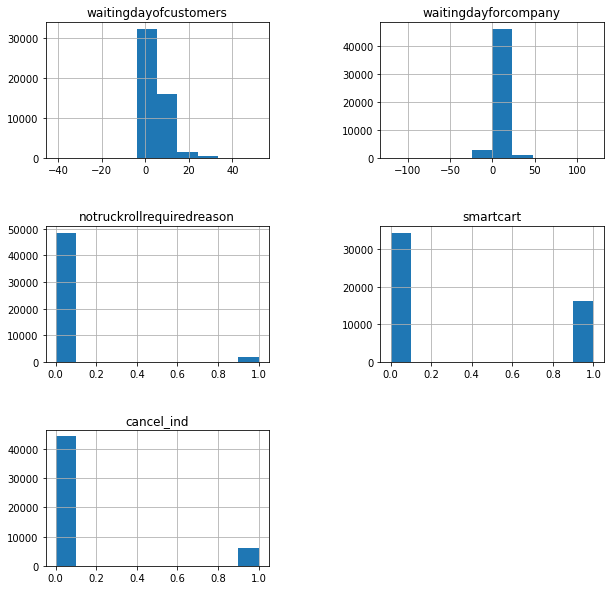

In [9]:
numeric_cols=['waitingdayofcustomers','waitingdayforcompany','notruckrollrequiredreason','smartcart','cancel_ind']
df2.hist(column=numeric_cols, figsize=(10,10))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

In [413]:
df2.head()

,mon,state,originalagency,speed,wirecenter,InstallType,competitorname,ContractType,salesrepid,order_create_date,...,strOrderType,strIsWinbackIndicator,notruckrollrequiredreason,droptype,premisetype,ONTselfinstallcapable,saleschannel,bundlename,smartcart,cancel_ind
0,NY11345685302,NY,REDVENT: REDVENT,FTTP_100M_100M,BREWSTER,TECH INSTALL,COMCAST,MONTHTOMONTH,A001696,2/4/18,...,N,NO,0,AERIAL,SFU,N,RED VENTURES,UNKNOWN,0,0
1,MD11346031526,MD,CSSC: CSSC,FTTP_1000M_1000M,OWEN BROWN,TECH INSTALL,COMCAST,CONTRACT,A002775,2/5/18,...,N,NO,0,BURIED,SFU,N,BIG BOX,1000M + TV Mundo + FDV Unlim,0,0
2,PA11346211594,PA,ONLINE: ONLINE,FTTP_100M_100M,BRADDOCK,TECH INSTALL,COMCAST,MONTHTOMONTH,239B3PA,2/7/18,...,N,NO,0,AERIAL,SFU,N,ONLINE CON,UNKNOWN,1,0
3,VA11346969162,VA,CSSC: CSSC,FTTP_1000M_1000M,DRUMMONDS CORNER,TECH INSTALL,COX COMM,CONTRACT,V660449,2/9/18,...,M,NO,0,BURIED,SFU,N,CSSC,1000M + Extreme HD - 2014 + NO FDV,0,0
4,NY11345471806,NY,ONLINE: ONLINE,FTTP_1000M_1000M,LEVITTOWN,TECH INSTALL,CABLEVISION,CONTRACT,C7962VZ,2/3/18,...,N,NO,0,AERIAL,SFU,N,ONLINE CON,1000M + Preferred HD 2015 + FDV Unlim,1,0


In [416]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50349 entries, 0 to 50348
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   mon                        50349 non-null  object  
 1   state                      50349 non-null  object  
 2   originalagency             50349 non-null  object  
 3   speed                      50349 non-null  object  
 4   wirecenter                 50349 non-null  category
 5   InstallType                50349 non-null  object  
 6   competitorname             50349 non-null  category
 7   ContractType               50349 non-null  object  
 8   salesrepid                 50349 non-null  category
 9   order_create_date          50349 non-null  object  
 10  endclientsystem            50349 non-null  category
 11  hfws_ind                   50349 non-null  category
 12  due_date                   50349 non-null  object  
 13  FIRSTOFFEREDDATE           5034

In [417]:
df2.columns

Index(['mon', 'state', 'originalagency', 'speed', 'wirecenter', 'InstallType',
       'competitorname', 'ContractType', 'salesrepid', 'order_create_date',
       'endclientsystem', 'hfws_ind', 'due_date', 'FIRSTOFFEREDDATE',
       'waitingdayofcustomers', 'waitingdayforcompany', 'BundleType',
       'ONTRequired', 'ONTInstall', 'strOrderType', 'strIsWinbackIndicator',
       'notruckrollrequiredreason', 'droptype', 'premisetype',
       'ONTselfinstallcapable', 'saleschannel', 'bundlename', 'smartcart',
       'cancel_ind'],
      dtype='object')

In [10]:
categs=['mon', 'state', 'originalagency', 'speed', 'wirecenter',
       'InstallType', 'competitorname', 'ContractType', 'salesrepid',
       'order_create_date', 'endclientsystem', 'hfws_ind', 'due_date',
       'FIRSTOFFEREDDATE',
       'BundleType', 'ONTRequired', 'ONTInstall', 'strOrderType',
       'strIsWinbackIndicator', 'droptype',
       'premisetype', 'ONTselfinstallcapable', 'saleschannel', 'bundlename']
df3=df2.copy()
df3=pd.get_dummies(df3, columns=categs)
df3

,waitingdayofcustomers,waitingdayforcompany,notruckrollrequiredreason,smartcart,cancel_ind,mon_CT11344998155,mon_CT11345110818,mon_CT11345262914,mon_CT11345330851,mon_CT11345484779,...,bundlename_75M + Select HD - 2014 + FDV Unlim,bundlename_75M + Select HD - 2014 + NO FDV,bundlename_75M + TV Mundo + FDV Unlim,bundlename_75M + TV Mundo + NO FDV,bundlename_75M + TV Mundo Total + FDV Unlim,bundlename_75M + TV Mundo Total + NO FDV,bundlename_75M + Ultimate HD + FDV Unlim,bundlename_75M + Ultimate HD + FTTP,bundlename_75M + Ultimate HD + NO FDV,bundlename_UNKNOWN
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,3,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,6,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10,2,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50344,34,-4,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50345,10,30,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50346,44,-4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50347,4,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [419]:
df3.memory_usage(deep=True).sum()

2850559112

## TARGET VECTOR  FEATURE VARİABLE 

In [11]:
X=df3.drop(columns='cancel_ind', axis=1)
y=df3['cancel_ind']


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [175]:
df.drop(df[due_date_indices])

KeyError: "None of [Int64Index([   42,   234,   447,   480,   633,   634,   672,   825,   826,\n              925,\n            ...\n            49513, 49765, 50030, 50107, 50195, 50205, 50210, 50240, 50320,\n            50510],\n           dtype='int64', length=232)] are in the [columns]"

In [217]:
avv=df.waitingdayofcustomers[50590]
print(avv)

#VALUE!


In [354]:
df[df.salesrepid.isnull()].query('cancel_ind==1.0')

,mon,state,originalagency,speed,wirecenter,InstallType,competitorname,ContractType,salesrepid,order_create_date,...,strOrderType,strIsWinbackIndicator,notruckrollrequiredreason,droptype,premisetype,ONTselfinstallcapable,saleschannel,bundlename,smartcart,cancel_ind
6527,NY11345698118,NY,CSSC: CSSC,FTTP_1000M_1000M,HOE AVENUE,TECH INSTALL,CABLEVISION,CONTRACT,NaN,2/4/18,...,N,NO,NaN,MDU_INSIDE,MDU,Y,ENG MGRS,1000M + Extreme HD - 2014 + FDV Unlim,1,1.0


In [114]:
(df[~df.hfws_ind.isnull()]
 .iloc[:22,9:]
 #.query('cancel_ind==1.0')
)

,order_create_date,canceldate,endclientsystem,hfws_ind,due_date,FIRSTOFFEREDDATE,waitingdayofcustomers,waitingdayforcompany,BUNDLE,BundleType,...,strOrderType,strIsWinbackIndicator,notruckrollrequiredreason,droptype,premisetype,ONTselfinstallcapable,saleschannel,bundlename,smartcart,cancel_ind
7,2/3/18,NaN,VZCOM,Y,2/12/18,2/12/18,9,0,D,D,...,N,NO,eONTSelfInstall,AERIAL,SFU,Y,ONLINE CON,UNKNOWN,0,NaN
15,2/3/18,1/0/00,COFEEANYWHERE,Y,2/25/18,2/12/18,9,13,TDV,TDV,...,N,NO,NaN,BURIED,SFU,Y,ONLINE CON,1000M + Custom TV Action and Entertainment + F...,1,1.0
35,2/9/18,NaN,COA2GO,Y,2/15/18,2/13/18,4,2,TDV,TDV,...,N,NO,NaN,BURIED,SFU,Y,UNKNOWN,1000M + Extreme HD - 2014 + FDV Unlim,1,NaN
61,2/9/18,NaN,COA2GO,Y,2/16/18,2/16/18,7,0,TDV,TDV,...,N,NO,NaN,AERIAL,SFU,Y,BIG BOX,1000M + Ultimate HD + FDV Unlim,0,NaN
132,2/9/18,1/0/00,COFEEANYWHERE,Y,2/15/18,2/15/18,6,0,DV,DV,...,N,NO,NaN,AERIAL,SFU,N,CSSC,1000M + TV Mundo + NO FDV,0,1.0
184,2/9/18,NaN,COFEEANYWHERE,Y,2/13/18,2/13/18,4,0,TDV,TDV,...,N,NO,NaN,AERIAL,SFU,Y,CSSC,1000M + Preferred HD 2015 + FDV Unlim,0,NaN
217,2/9/18,NaN,COA2GO,Y,2/15/18,2/15/18,6,0,DV,DV,...,N,NO,eONTSelfInstall,MDU_INSIDE,MDU,Y,D2D CON,1000M + Preferred HD 2015 + NO FDV,0,NaN
288,2/9/18,1/0/00,iVAPP-Controller,Y,2/14/18,2/14/18,5,0,D,D,...,N,NO,NaN,AERIAL,SFU,Y,ONLINE CON,UNKNOWN,1,1.0
295,2/11/18,NaN,COA2GO,Y,2/24/18,2/21/18,10,3,D,D,...,N,NO,eONTSelfInstall,AERIAL,SFU,Y,INET ACQ CON,UNKNOWN,0,NaN
333,2/11/18,1/0/00,COFEEANYWHERE,Y,2/20/18,2/20/18,9,0,DV,DV,...,N,NO,NaN,AERIAL,SFU,Y,RED VENTURES,1000M + Custom TV Home and Family + NO FDV,0,1.0


In [138]:
#df[df.canceldate.isnull()].iloc[:22,9:22].head(8)
(df[df.due_date.isnull()]
 .iloc[:22,9:].head(60)
 #.query('waitingdayofcustomers.str.contains('3')')
)

,order_create_date,canceldate,endclientsystem,hfws_ind,due_date,FIRSTOFFEREDDATE,waitingdayofcustomers,waitingdayforcompany,BUNDLE,BundleType,...,strOrderType,strIsWinbackIndicator,notruckrollrequiredreason,droptype,premisetype,ONTselfinstallcapable,saleschannel,bundlename,smartcart,cancel_ind
42,2/9/18,NaN,NaN,NaN,NaN,NaN,#VALUE!,#VALUE!,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNKNOWN,0,NaN
234,2/12/18,NaN,NaN,NaN,NaN,NaN,#VALUE!,#VALUE!,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNKNOWN,0,NaN
447,2/10/18,NaN,COFEEANYWHERE,NaN,NaN,NaN,#VALUE!,#VALUE!,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNKNOWN,0,NaN
480,2/9/18,NaN,NaN,NaN,NaN,NaN,#VALUE!,#VALUE!,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNKNOWN,0,NaN
633,2/9/18,NaN,NaN,NaN,NaN,NaN,#VALUE!,#VALUE!,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNKNOWN,0,NaN
634,2/9/18,NaN,COFEEANYWHERE,NaN,NaN,NaN,#VALUE!,#VALUE!,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNKNOWN,0,NaN
672,2/9/18,NaN,NaN,NaN,NaN,NaN,#VALUE!,#VALUE!,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNKNOWN,0,NaN
825,2/9/18,NaN,NaN,NaN,NaN,NaN,#VALUE!,#VALUE!,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNKNOWN,0,NaN
826,2/9/18,NaN,NaN,NaN,NaN,NaN,#VALUE!,#VALUE!,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNKNOWN,0,NaN
925,2/9/18,NaN,NaN,NaN,NaN,NaN,#VALUE!,#VALUE!,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNKNOWN,0,NaN


In [232]:

#df.query('waitingdayofcustomers == #VALUE!')
(df
 [df.waitingdayofcustomers != '#VALUE!']
 .assign(waitingdayofcustomers=df.waitingdayofcustomers.astype('int8'),
 )
 .waitingdayofcustomers.describe()
)

ValueError: invalid literal for int() with base 10: '#VALUE!'

In [267]:
jh=df['waitingdayofcustomers'].copy()
jh=pd.to_numeric(jh, errors='coerce').value_counts(dropna=False)
jh.isna().any()

False

In [268]:
jh

 4.0     7296
 2.0     5752
 5.0     5608
 3.0     5457
 6.0     4950
         ... 
-22.0       1
-6.0        1
-41.0       1
-29.0       1
 52.0       1
Name: waitingdayofcustomers, Length: 67, dtype: int64

## 5 -  XGBClassifier ile deneme !!!

In [13]:

from xgboost import XGBClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold

In [14]:
# Import the XGBoostRegressorn
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn import metrics


# Create xgboost classifer object
xgb = XGBClassifier()

# Train XGBoost Classifer
model_xgb = xgb.fit(X_train, y_train)


#Predict the response for test dataset
y_pred_xgb = model_xgb.predict(X_test)

# roc_auc
print('XGBoost ile R2: {0:0.2f}'.format(metrics.r2_score(y_test, y_pred_xgb)))

XGBoostError: bad allocation

In [16]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test,y_test)

MemoryError: Unable to allocate 17.0 GiB for an array with shape (40279, 56615) and data type float64

In [17]:
from sklearn import tree

model = tree.DecisionTreeClassifier()

model.fit(X_train, y_train)
model.score(X_test,y_test)

MemoryError: Unable to allocate 8.50 GiB for an array with shape (40279, 56615) and data type float32

In [718]:
y_pred_xgb = model_xgb.predict(X_test)

In [570]:
y_pred_xgb

array([ 7566.011, 10479.19 , 16279.214, ..., 11292.897, 14773.381,
       20248.348], dtype=float32)

In [987]:
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.model_selection import cross_validate

Scoring_type={'R2': metrics.make_scorer(lambda x,y: 100*metrics.r2_score(x,y)),
             'MAPE': metrics.make_scorer(lambda x,y: 100*metrics.mean_absolute_percentage_error(x,y)),
             'WAPE': metrics.make_scorer(wape), 'MSE': metrics.make_scorer(lambda x,y: metrics.mean_squared_error(x,y))}
cv=KFold(n_splits=10)
cv_results=cross_validate(model_xgb, X_train, y_train, n_jobs=-1, 
                         return_train_score=True, cv=cv, scoring=Scoring_type,verbose=True,return_estimator=True)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   23.0s finished


In [90]:
cv_results

{'fit_time': array([4.05030107, 4.0743103 , 3.42295194, 3.45396757, 3.17671895,
        3.17270756, 2.60458803, 2.54857349, 2.60858989, 2.58857989]),
 'score_time': array([0.02000308, 0.01800132, 0.02000141, 0.01600266, 0.01600266,
        0.01600289, 0.01600766, 0.01600766, 0.01600027, 0.01600313]),
 'estimator': [XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
               colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
               importance_type=None, interaction_constraints='',
               learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
               max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
               missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
               num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
          

In [988]:
dfcv_result=pd.DataFrame(cv_results)
dfcv_result

,fit_time,score_time,estimator,test_R2,train_R2,test_MAPE,train_MAPE,test_WAPE,train_WAPE,test_MSE,train_MSE
0,4.603789,0.028647,"XGBRegressor(base_score=0.5, booster='gbtree',...",94.924774,98.015244,5.580338,4.293577,5.677100,4.078953,2.714608e+06,1.096209e+06
1,4.483167,0.030137,"XGBRegressor(base_score=0.5, booster='gbtree',...",92.123582,98.112101,5.907157,4.201121,5.954781,3.990084,4.200248e+06,1.043085e+06
2,4.630719,0.030195,"XGBRegressor(base_score=0.5, booster='gbtree',...",94.593017,98.022602,5.909412,4.315061,5.924316,4.079728,2.906105e+06,1.091509e+06
3,4.681252,0.040251,"XGBRegressor(base_score=0.5, booster='gbtree',...",93.881074,98.011085,5.834994,4.295081,5.835185,4.085021,3.005202e+06,1.107801e+06
4,4.319634,0.018088,"XGBRegressor(base_score=0.5, booster='gbtree',...",95.072420,98.049490,5.939934,4.251974,6.017787,4.027925,2.912692e+06,1.065129e+06
5,4.279624,0.030175,"XGBRegressor(base_score=0.5, booster='gbtree',...",94.965860,98.024583,5.876055,4.298743,5.955812,4.071259,3.231961e+06,1.067424e+06
6,4.222159,0.028157,"XGBRegressor(base_score=0.5, booster='gbtree',...",95.036678,98.090706,5.790088,4.209601,5.791394,3.997888,2.905747e+06,1.043789e+06
7,4.240246,0.038178,"XGBRegressor(base_score=0.5, booster='gbtree',...",95.475149,98.000173,5.749137,4.295264,5.625414,4.107763,2.471843e+06,1.102017e+06
8,4.282303,0.028141,"XGBRegressor(base_score=0.5, booster='gbtree',...",94.257351,98.036922,5.912395,4.316786,6.010284,4.080888,2.972926e+06,1.087972e+06
9,4.302596,0.020064,"XGBRegressor(base_score=0.5, booster='gbtree',...",93.955198,98.106852,5.976001,4.216984,5.913316,3.995865,3.157195e+06,1.048076e+06
